In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [28]:
reg_data = pd.read_csv("data/17년_21년 세대당 자동차등록_20211231.csv")

# 컬럼명 변경
reg_data.rename(columns={"통계연도":"연도",
                        "세대당 자동차등록(대)":"세대당등록",
                        "주민등록세대수(명)":"세대수",
                        "자동차등록대수(대)":"차량등록대수"}, inplace=True)

# 연도별, 도별 세대수, 차량등록대수 추출
reg_data = reg_data.groupby(["연도","시도명"])[["세대수","차량등록대수"]].sum()

# 세대당 자동차 등록대수 계산
reg_data["세대당등록수"] = round(reg_data["차량등록대수"]/reg_data["세대수"],3)
reg_data

세대수   차량등록대수  세대당등록수
연도   시도명                              
2017 강원도       700265   745959   1.065
     경기도      7293253  7549882   1.035
     경상남도     1826528  2227325   1.219
     경상북도     1407273  1649486   1.172
     광주광역시     592818   649293   1.095
...               ...      ...     ...
2021 전라남도      903108  1172282   1.298
     전라북도     1142208  1298250   1.137
     제주특별자치도   307529   658594   2.142
     충청남도     1299902  1519895   1.169
     충청북도     1147688  1344394   1.171

[80 rows x 3 columns]

In [29]:
# 인덱스 초기화
reg_data = reg_data.reset_index()
reg_data

,연도,시도명,세대수,차량등록대수,세대당등록수
0,2017,강원도,700265,745959,1.065
1,2017,경기도,7293253,7549882,1.035
2,2017,경상남도,1826528,2227325,1.219
3,2017,경상북도,1407273,1649486,1.172
4,2017,광주광역시,592818,649293,1.095
...,...,...,...,...,...
75,2021,전라남도,903108,1172282,1.298
76,2021,전라북도,1142208,1298250,1.137
77,2021,제주특별자치도,307529,658594,2.142
78,2021,충청남도,1299902,1519895,1.169


In [30]:
# 연도별 차트 구분
reg_data2017 = reg_data[reg_data["연도"]==2017].drop(columns = "연도").set_index("시도명")
reg_data2018 = reg_data[reg_data["연도"]==2018].drop(columns = "연도").set_index("시도명")
reg_data2019 = reg_data[reg_data["연도"]==2019].drop(columns = "연도").set_index("시도명")
reg_data2020 = reg_data[reg_data["연도"]==2020].drop(columns = "연도").set_index("시도명")
reg_data2021 = reg_data[reg_data["연도"]==2021].drop(columns = "연도").set_index("시도명")
reg_data2021

,세대수,차량등록대수,세대당등록수
시도명,,,
강원도,746220,828146,1.110
경기도,8172214,8554726,1.047
경상남도,1957911,2451903,1.252
경상북도,1509047,1776477,1.177
광주광역시,645712,700783,1.085
대구광역시,1063893,1211095,1.138
대전광역시,664417,692702,1.043
부산광역시,1544663,1464608,0.948
서울특별시,4426007,3176743,0.718


In [37]:
# reg_data2021 = reg_data[reg_data["연도"]==2021].drop(columns = "연도")
# reg_data2021.columns.values[0]="지역"
# reg_data2021

X_train = pd.read_csv('data/pre_train.csv')
si_car_reg = X_train.groupby("지역")[["등록차량수","주차면수","전용면적별세대수"]].sum()
si_car_reg["세대별등록차량"] = si_car_reg["등록차량수"]/si_car_reg["전용면적별세대수"]
si_car_reg

,등록차량수,주차면수,전용면적별세대수,세대별등록차량
지역,,,,
강원도,72602.0,68569.0,17765,4.086800
경기도,474453.0,489180.0,68790,6.897122
경상남도,148716.0,169152.0,35211,4.223566
경상북도,68138.0,63416.0,12078,5.641497
광주광역시,103192.0,94968.0,17206,5.997443
대구광역시,89099.0,81779.0,14498,6.145606
대전광역시,142415.0,184400.0,25379,5.611529
부산광역시,103827.0,153410.0,28849,3.598981
서울특별시,34139.0,33203.0,4034,8.462816


In [38]:
a = pd.read_csv("data/age_gender_info.csv")
a["노인청소년"] = a["10대미만(여자)"]+a["10대미만(남자)"]+a["10대(여자)"]+a["10대(남자)"]+a["70대(여자)"]+a["70대(남자)"]+a["80대(여자)"]+a["80대(남자)"]+a["90대(여자)"]+a["90대(남자)"]+a["100대(여자)"]+a["100대(남자)"]
ag = a[["지역","노인청소년"]]
ag.set_index("지역")

,노인청소년
지역,
경상북도,0.306899
경상남도,0.289602
대전광역시,0.283527
경기도,0.304165
전라북도,0.320675
강원도,0.300243
광주광역시,0.294664
충청남도,0.298290
부산광역시,0.323989


In [34]:
si_car_reg = pd.merge(si_car_reg, ag, on='지역', how='inner').set_index("지역")
si_car_reg

,등록차량수,주차면수,노인청소년
지역,,,
강원도,72602.0,68569.0,0.300243
경기도,474453.0,489180.0,0.304165
경상남도,148716.0,169152.0,0.289602
경상북도,68138.0,63416.0,0.306899
광주광역시,103192.0,94968.0,0.294664
대구광역시,89099.0,81779.0,0.265155
대전광역시,142415.0,184400.0,0.283527
부산광역시,103827.0,153410.0,0.323989
서울특별시,34139.0,33203.0,0.327542


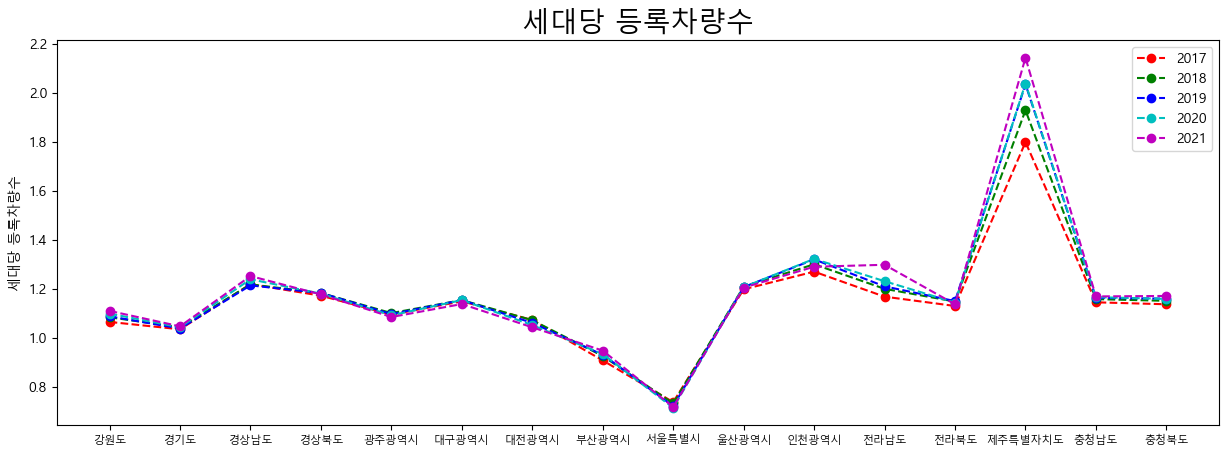

In [31]:
# 세대별 자동차 등록대수 시각화
fig=plt.figure(figsize=(15,5))
fig.set_facecolor("white")
ax1 = fig.add_subplot() ## axes 생성

colors = sns.color_palette('summer', len(reg_data2017.index)) ## 바 차트 색상
xtick_label_position = list(range(len(reg_data2017.index))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(reg_data2017.index, fontsize=8) ## x축 눈금 라벨
ax1.plot(xtick_label_position, reg_data2017["세대당등록수"], color="r", linestyle='--', marker='o', label="2017") ## 선 그래프 
ax1.plot(xtick_label_position, reg_data2018["세대당등록수"], color="g", linestyle='--', marker='o', label="2018") ## 선 그래프 
ax1.plot(xtick_label_position, reg_data2019["세대당등록수"], color="b", linestyle='--', marker='o', label="2019") ## 선 그래프 
ax1.plot(xtick_label_position, reg_data2020["세대당등록수"], color="c", linestyle='--', marker='o', label="2020") ## 선 그래프 
ax1.plot(xtick_label_position, reg_data2021["세대당등록수"], color="m", linestyle='--', marker='o', label="2021") ## 선 그래프 
ax1.set_ylabel("세대당 등록차량수")

plt.legend()
plt.title('세대당 등록차량수', fontsize=20)
plt.legend()
plt.show()

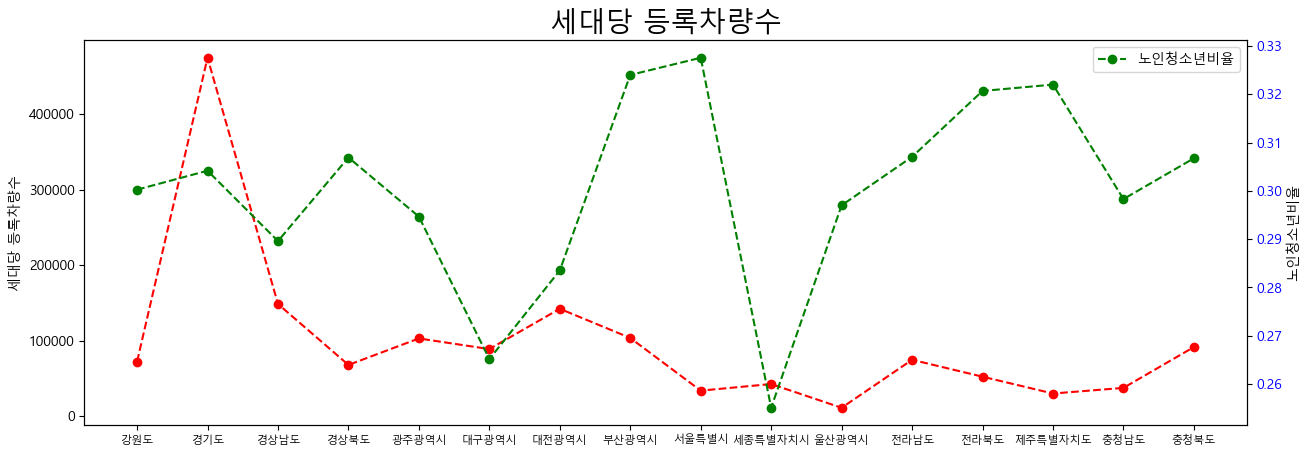

In [35]:
# 세대별 자동차 등록대수 시각화
fig=plt.figure(figsize=(15,5))
fig.set_facecolor("white")
ax1 = fig.add_subplot() ## axes 생성

colors = sns.color_palette('summer', len(si_car_reg.index)) ## 바 차트 색상
xtick_label_position = list(range(len(si_car_reg.index))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(si_car_reg.index, fontsize=8) ## x축 눈금 라벨
ax1.plot(xtick_label_position, si_car_reg["등록차량수"], color="r", linestyle='--', marker='o', label="등록대수") ## 선 그래프  
ax1.set_ylabel("세대당 등록차량수")

ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, si_car_reg["노인청소년"], color="g", linestyle='--', marker='o', label="노인청소년비율") ## 선 그래프 
ax2.tick_params(axis='y', labelcolor="blue") ## 눈금 라벨 색상 지정
ax2.set_ylabel("노인청소년비율")

plt.legend()
plt.title('세대당 등록차량수', fontsize=20)
plt.legend()
plt.show()